In [55]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score



In [5]:
admission_data=pd.read_csv("D:\datasets\Admission_Predict_Ver1.1.csv")
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admission_data.shape

(500, 9)

In [7]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
admission_data.duplicated().sum()

0

In [118]:
admission_data.drop(columns=['Serial No.'],inplace= True)
admission_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [119]:
X = admission_data.iloc[:,:-1]
y = admission_data.iloc[:,-1]

In [120]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [121]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [123]:
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (400, 7)
X test shape is : (100, 7)
y test shape is : (400,)
y test shape is : (100,)


In [124]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [125]:
#scaling the data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = tf.expand_dims(X_train_scaled, axis=-1)

In [140]:
#applying the neural networks
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [141]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 7)                 56        
                                                                 
 dense_77 (Dense)            (None, 7)                 56        
                                                                 
 dense_78 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss='mean_squared_error',optimizer="Adam",metrics=['accuracy'])
history= model.fit(X_train_scaled,y_train,epochs =20,validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 1s 39ms/step - loss: 0.4422 - accuracy: 0.0000e+00 - val_loss: 0.4299 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.3363 - accuracy: 0.0000e+00 - val_loss: 0.3162 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.2375 - accuracy: 0.0000e+00 - val_loss: 0.2080 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 0.0000e+00 - val_loss: 0.1255 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0931 - accuracy: 0.0000e+00 - val_loss: 0.0800 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0691 - accuracy: 0.0000e+00 - val_loss: 0.0645 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0612 - accuracy: 0.0000e+00 - val_los

In [143]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [144]:
r2_score(y_test,y_pred)

0.25103859992628597

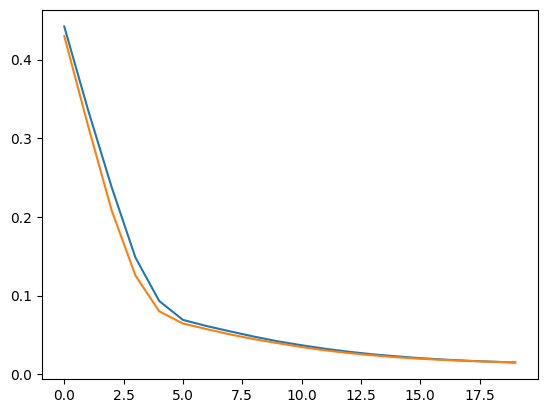

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

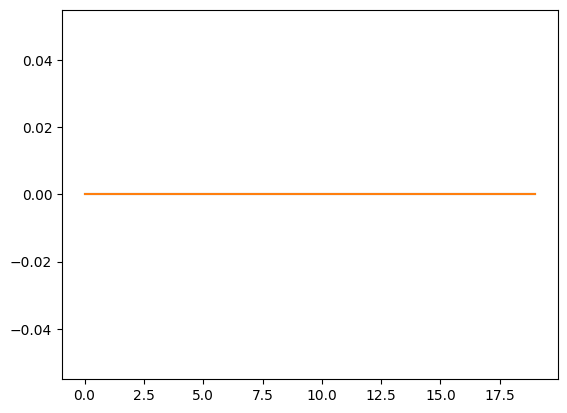

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])